In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head(7)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.7470,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.3700,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
5,IND,India,AKRIMOTA LIG,IND0000003,250.0,23.7689,68.6447,Coal,Oil,NaN,...,2019.0,NaN,1153.421000,1208.8520,1175.765000,1147.913000,976.655000,NaN,Central Electricity Authority,NaN
6,IND,India,ALIYAR,IND0000004,60.0,10.4547,77.0078,Hydro,NaN,NaN,...,2019.0,NaN,157.558250,152.1952,61.421350,89.629600,48.327150,NaN,Central Electricity Authority,NaN


In [3]:
#Doing EDA ananalysis
#Finding of colums
#Checking the releation among columns
#Seeing for null values if there exists any
df.columns


Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [4]:
df.shape

(907, 27)

In [5]:
df.drop(["country_long","year_of_capacity_data"],axis=1,inplace=True)
df

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,...,NaN,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,...,NaN,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,...,NaN,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

country                       0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [7]:
df.replace(np.nan, 0)

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,0,0,0.0,...,0.0,0.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0,Central Electricity Authority,0.0
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,0,0.0,...,0.0,0.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,0,0.0,...,0.0,0.0,0.000000,0.994875,233.596650,865.400000,686.500000,0.0,Central Electricity Authority,0.0
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0


In [8]:
df.fillna(0)

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,...,wepp_id,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,0,0,0.0,...,0.0,0.0,617.789264,843.747000,886.004428,663.774500,626.239128,0.0,Central Electricity Authority,0.0
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,0,0.0,...,0.0,0.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0.0,Central Electricity Authority,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,0,0.0,...,0.0,0.0,0.000000,0.994875,233.596650,865.400000,686.500000,0.0,Central Electricity Authority,0.0
903,IND,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
904,IND,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0
905,IND,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,0,0,0.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.0


In [9]:
df_categorical=df[['primary_fuel']].copy()

df_categorical.columns

Index(['primary_fuel'], dtype='object')

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


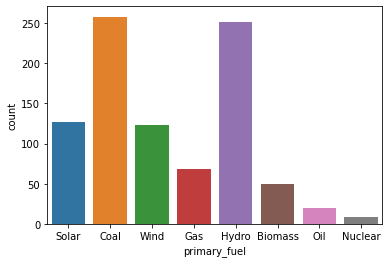

In [10]:
#Data distribution for target variable
import seaborn as sns
ax=sns.countplot(x='primary_fuel',data=df_categorical)
print(df_categorical["primary_fuel"].value_counts())

In [11]:
#Split the dataframe columns sepearately identifying which columns are using to find primary fuel and which are using to find capacity_mw

In [12]:
#Dropping the columns which are null and not contributing and useful for finding the target variable 
df.drop(["generation_gwh_2013","generation_gwh_2019",],axis=1,inplace=True)

In [13]:
df.drop(["estimated_generation_gwh","generation_data_source"],axis=1,inplace=True)

In [14]:
df.isnull().sum()

country                  0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
other_fuel1            709
other_fuel2            906
other_fuel3            907
commissioning_year     380
owner                  565
source                   0
url                      0
geolocation_source      19
wepp_id                907
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

In [15]:
#Columns used to find capacity_mw
df_continous=df[['capacity_mw','generation_gwh_2014','generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']].copy()
df_continous.columns

Index(['capacity_mw', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

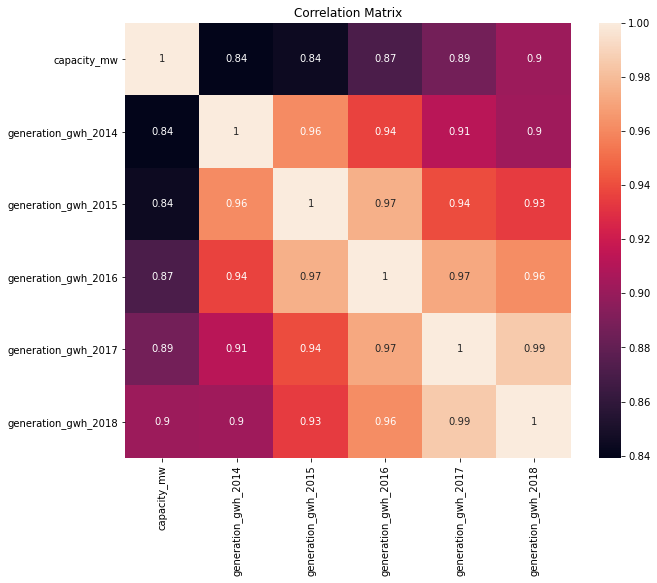

In [16]:
#Checking the correlation
corr_matrix=df_continous.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation Matrix")
plt.show()

<AxesSubplot:xlabel='generation_gwh_2014', ylabel='Density'>

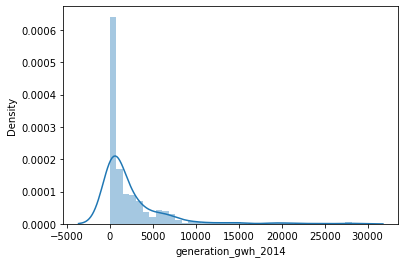

In [17]:
sns.distplot(df_continous['generation_gwh_2014'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2015', ylabel='Density'>

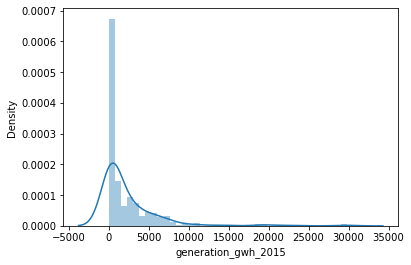

In [18]:
sns.distplot(df_continous['generation_gwh_2015'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2016', ylabel='Density'>

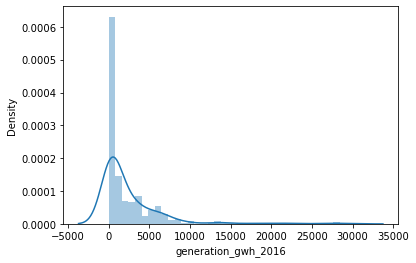

In [19]:
sns.distplot(df_continous['generation_gwh_2016'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2017', ylabel='Density'>

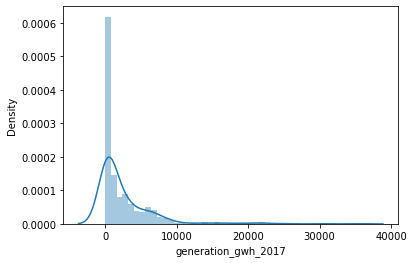

In [20]:
sns.distplot(df_continous['generation_gwh_2017'],kde=True)

<AxesSubplot:xlabel='generation_gwh_2018', ylabel='Density'>

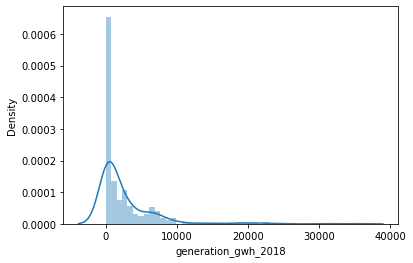

In [21]:
sns.distplot(df_continous['generation_gwh_2018'],kde=True)

In [22]:
df_continous.drop(['generation_gwh_2018'],axis=1,inplace=True)

In [23]:
df_continous.skew()

capacity_mw            3.123576
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
dtype: float64

In [24]:
df["generation_gwh_2015"] = df["generation_gwh_2015"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['generation_gwh_2015'].skew())


0.5537916029582354


In [25]:
df["generation_gwh_2016"] = df["generation_gwh_2016"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['generation_gwh_2016'].skew())

0.5066963932192231


In [26]:
df["generation_gwh_2017"] = df["generation_gwh_2017"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['generation_gwh_2017'].skew())

0.4872450014413864


In [27]:
df["capacity_mw"] = df["capacity_mw"].map(lambda i: np.log(i) if i > 0 else 0) 
print(df['capacity_mw'].skew())

0.01627217271103007


In [28]:
#Skewness removed and data is within the range
#Spliting the data into features and target

In [33]:
#Checking for model accuracy using Logistic Regression techniques
x=df.drop("capacity_mw",axis=1)
y=df["capacity_mw"]

In [34]:
#Observed that some columns have missing or null values need to treat them using Imputation

df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [35]:
df.dtypes

country                 object
name                    object
gppd_idnr               object
capacity_mw            float64
latitude               float64
longitude              float64
primary_fuel            object
other_fuel1             object
other_fuel2             object
other_fuel3            float64
commissioning_year     float64
owner                   object
source                  object
url                     object
geolocation_source      object
wepp_id                float64
generation_gwh_2014    float64
generation_gwh_2015    float64
generation_gwh_2016    float64
generation_gwh_2017    float64
generation_gwh_2018    float64
dtype: object

In [36]:
#Checking for model accuracy using Ridge,Lasso Regression techniques
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#Model Instantiation and Training
LE=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=40)
LE.fit(x_train,y_train)
LE.predict(x_test)

ValueError: could not convert string to float: 'IND'

In [ ]:
LE.score(x_train,y_train)

In [ ]:
#Checking how well the model has learned the test data
LE.score(x_test,y_test)

In [1]:
#Checking for Model Overfitting 
#Using Regularization 
from sklearn.linear_model import Lasso,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

NameError: name 'x_train' is not defined

In [2]:
alpha=lasscv.alpha_
alpha

AttributeError: 'LassoCV' object has no attribute 'alpha_'

In [ ]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

In [ ]:
lasscv.score(x_test,y_test)

In [ ]:
#Among the two models observed that Lasso gives a betetr accuarcy to find the capacity_mw which is displayed above

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=41)
clf=RandomForestClassifier()

In [ ]:
grid_grid_search.fit(x_train_y_train)